# Лабораторная работа 1: История о данных

Обоснования для выбора набора данных: мне интересно про фильмы на самом деле и мне не так важно на чем учиться строить графики

[![Kaggle](https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/datasets/rajugc/imdb-top-250-movies-dataset)


ссылка на изначальный датасет (кнопка)

[![IMDB TOP 250](https://img.shields.io/badge/%D1%81%D1%81%D1%8B%D0%BB%D0%BA%D0%B0%20%D0%BD%D0%B0-%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82-blue?style=social&logo=kaggle)](https://www.kaggle.com/datasets/rajugc/imdb-top-250-movies-dataset)



![img](./kagge-link.png)

## Используемые библиотеки

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import __version__ as mpl_version
import matplotlib.pyplot as plt

print(f"Версия pandas: {pd.__version__}")
print(f"Версия seaborn {sns.__version__}")
print(f"Версия matplotlib {mpl_version}")

Версия pandas: 1.5.3
Версия seaborn 0.12.2
Версия matplotlib 3.6.2


## Первичная обработка скачанного датасета

In [2]:
df = pd.read_csv('data/IMDB Top 250 Movies.csv')

df.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


# Поля датасета

- Rank - Ранг фильма (из топ 250 по IMDB) 
- Name - Название фильма 
- Year - Год выпуска фильма 
- Rating - Рейтинг фильма (от 0 до 10)
- genre - Жанр фильма
- certificate - Рейтинг фильма (по MPAA) 
- run_time - Продолжительность фильма
- tagline - Слоган
- budget - Бюджет фильма (в долларах США)
- box_office - Сборы фильма (по всему миру)
- directors - Режиссер(-ы) фильма
- writers - Автор(-ы) сценария

Проверка датасета на пустые значения

In [3]:
df.isnull().sum()

rank           0
name           0
year           0
rating         0
genre          0
certificate    0
run_time       0
tagline        0
budget         0
box_office     0
casts          0
directors      0
writers        0
dtype: int64

In [3]:
df_no_na = df.dropna()

In [4]:
df_no_na.count()

rank           250
name           250
year           250
rating         250
genre          250
certificate    250
run_time       250
tagline        250
budget         250
box_office     250
casts          250
directors      250
writers        250
dtype: int64

Казалось, что все в этом датасете хорошо,но на самом деле...

In [5]:
df.dtypes

rank             int64
name            object
year             int64
rating         float64
genre           object
certificate     object
run_time        object
tagline         object
budget          object
box_office      object
casts           object
directors       object
writers         object
dtype: object

Переведем продолжительность фильма из предоставленного формата в сумму минут для удобства последующего анализа и построения графиков

In [6]:
df_no_na['run_time_m'] = df_no_na['run_time'].str.extract('(\d+)h', expand=False).astype(float)*60 + df_no_na['run_time'].str.extract('(\d+)m', expand=False).astype(float)

df_no_na['run_time_m'].head()

0    142.0
1    175.0
2    152.0
3    202.0
4     96.0
Name: run_time_m, dtype: float64

Новый столбец ```df_no_na["run_time_m"]``` содержит продолжительность фильма (в минутах)

Часть значений в колонках 'budget' и 'box_office' распознаются неправильно. Часть значений содержит строку Not Available

In [7]:
na_field_count = 0

for line in df_no_na['budget']:
    tmp = line
    if tmp[0]=='$':
        tmp = tmp[1:]
    if tmp=='Not Available':
        na_field_count+=1
    # print(f"budget is {tmp} ")


print(f"Для {na_field_count} фильмов не известен бюджет")

Для 39 фильмов не известен бюджет


In [8]:
na_field_count = 0

for line in df_no_na['box_office']:
    tmp = line
    if tmp[0]=='$':
        tmp = tmp[1:]
    if tmp=='Not Available':
        na_field_count+=1
    # print(f"budget is {tmp} ")


print(f"Для {na_field_count} фильмов не известны сборы")

Для 30 фильмов не известны сборы


In [9]:
na_field_count = 0

for line in df_no_na.values:
    budget_navail = line[8] == 'Not Available'
    box_office_navail = (line[9] == 'Not Available')
    if budget_navail and box_office_navail:
        na_field_count +=1
        print(f'Для фильма "{line[1]} не известны бюджет и кассовые сборы"')

print(na_field_count)


Для фильма "Harakiri не известны бюджет и кассовые сборы"
Для фильма "Spider-Man: Into the Spider-Verse не известны бюджет и кассовые сборы"
Для фильма "Good Will Hunting не известны бюджет и кассовые сборы"
Для фильма "Your Name. не известны бюджет и кассовые сборы"
Для фильма "High and Low не известны бюджет и кассовые сборы"
Для фильма "Capernaum не известны бюджет и кассовые сборы"
Для фильма "Come and See не известны бюджет и кассовые сборы"
Для фильма "The Hunt не известны бюджет и кассовые сборы"
Для фильма "Hamilton не известны бюджет и кассовые сборы"
Для фильма "Dangal не известны бюджет и кассовые сборы"
Для фильма "The Secret in Their Eyes не известны бюджет и кассовые сборы"
Для фильма "My Neighbor Totoro не известны бюджет и кассовые сборы"
Для фильма "Catch Me If You Can не известны бюджет и кассовые сборы"
Для фильма "Children of Heaven не известны бюджет и кассовые сборы"
Для фильма "Klaus не известны бюджет и кассовые сборы"
Для фильма "Gone Girl не известны бюджет и 

In [10]:
df_no_na.dtypes

rank             int64
name            object
year             int64
rating         float64
genre           object
certificate     object
run_time        object
tagline         object
budget          object
box_office      object
casts           object
directors       object
writers         object
run_time_m     float64
dtype: object

In [13]:
df_no_na[df_no_na['box_office']=='Not Available'].index

Int64Index([ 44,  65,  80,  81,  86,  87,  92,  93, 107, 124, 162, 171, 172,
            174, 179, 183, 188, 194, 195, 206, 207, 220, 227, 228, 231, 233,
            234, 238, 242, 247],
           dtype='int64')

Удаление всех строк без известных сборов

In [14]:
df_no_na = df_no_na.drop(index=df_no_na[df_no_na['box_office']=='Not Available'].index).count()

rank           220
name           220
year           220
rating         220
genre          220
certificate    220
run_time       220
tagline        220
budget         220
box_office     220
casts          220
directors      220
writers        220
run_time_m     214
dtype: int64

Удаление всех строк без известного бюджета

In [21]:
df_no_na = df_no_na.drop(index=df_no_na[df_no_na['budget']=='Not Available'].index).count()

In [22]:
df_no_na['box_office_usd'] = df_no_na['box_office'].astype(float)

In [28]:
for val in df_no_na:
    print(val)

211.0
211.0
211.0
211.0
211.0
211.0
211.0
211.0
211.0
211.0
211.0
211.0
211.0
205.0
211.0


In [29]:
df_no_na.dtypes

rank             int64
name            object
year             int64
rating         float64
genre           object
certificate     object
run_time        object
tagline         object
budget          object
box_office      object
casts           object
directors       object
writers         object
dtype: object

<Axes: xlabel='new_runtime-', ylabel='rating'>

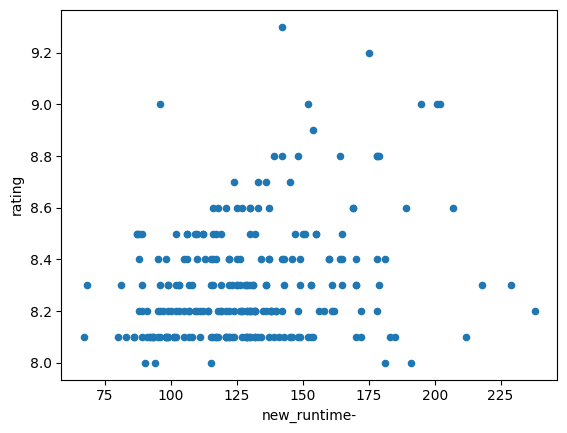

In [78]:
df.plot.scatter(x='new_runtime-', y="rating")

/var/folders/g8/xtt465_57r53fy239yttrrrm0000gn/T/ipykernel_79924/2319445974.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f')


<Axes: >

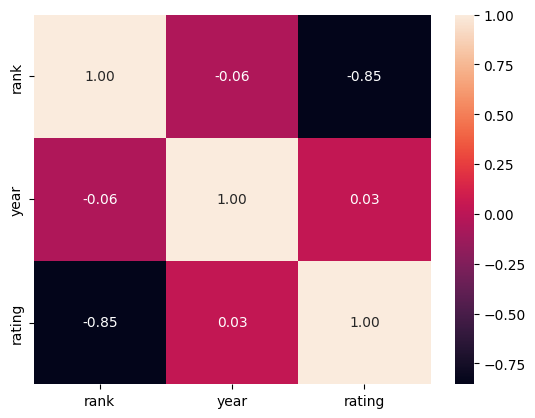

In [65]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

<Axes: xlabel='rating', ylabel='certificate'>

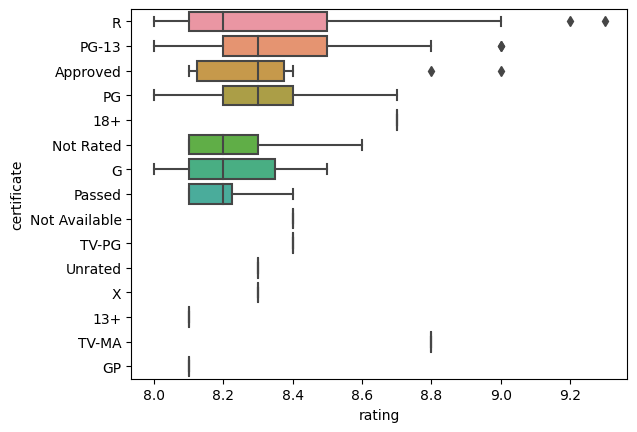

In [38]:
sns.boxplot( x=df["rating"], y=df["certificate"])

/var/folders/g8/xtt465_57r53fy239yttrrrm0000gn/T/ipykernel_79924/3710418572.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a=df["rating"], hist=True, kde=False, rug=False )


<Axes: xlabel='rating'>

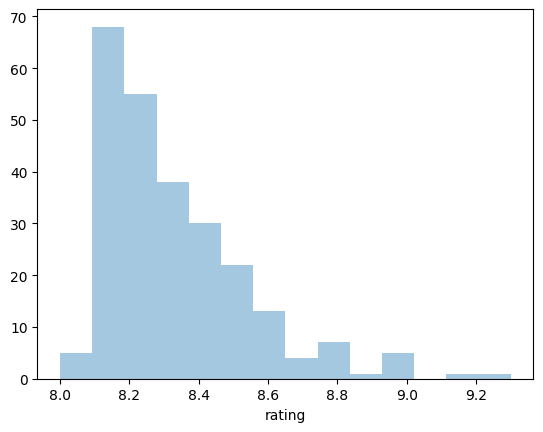

In [39]:
sns.distplot( a=df["rating"], hist=True, kde=False, rug=False )

In [42]:
df['genre']

0                           Drama
1                     Crime,Drama
2              Action,Crime,Drama
3                     Crime,Drama
4                     Crime,Drama
                  ...            
245                         Drama
246     Adventure,Biography,Drama
247    Animation,Adventure,Comedy
248       Biography,Drama,History
249       Adventure,Drama,Western
Name: genre, Length: 250, dtype: object

<Axes: xlabel='year', ylabel='rating'>

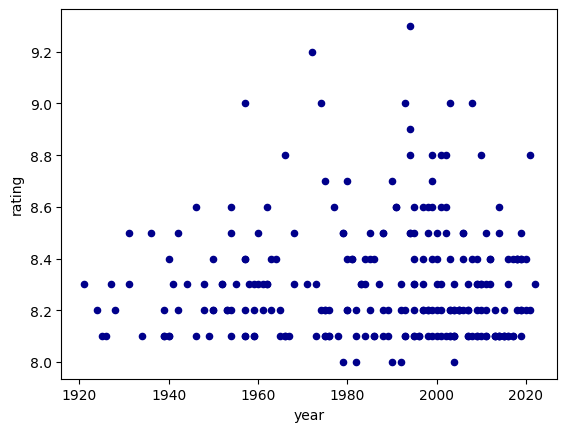

In [45]:
df.plot.scatter(x='year',
                      y='rating',
                       c='DarkBlue')

<Axes: xlabel='rating', ylabel='year'>

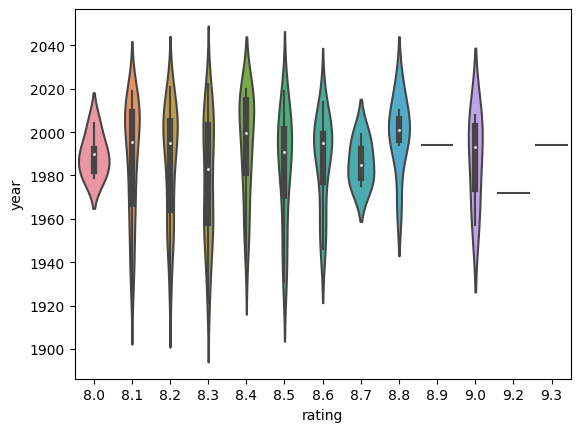

In [60]:
sns.violinplot(x=df["rating"], y=df["year"])